In [1]:
import numpy as np
import pandas as pd
import graphs
import collections
import operator
import genre_mapping

In [2]:
graphs.init_setup()

In [3]:
moods = pd.read_csv('ab-2017-01-24-highlevel-moods.csv')

In [4]:
mood_acoustic = moods['value_mood_acoustic']
ac_counts = pd.Series.value_counts(mood_acoustic)

In [5]:
mood_aggressive = moods['value_mood_aggressive']
ag_counts = pd.Series.value_counts(mood_aggressive)

In [6]:
mood_electronic = moods['value_mood_electronic']
el_counts = pd.Series.value_counts(mood_electronic)

In [7]:
mood_happy = moods['value_mood_happy']
ha_counts = pd.Series.value_counts(mood_happy)

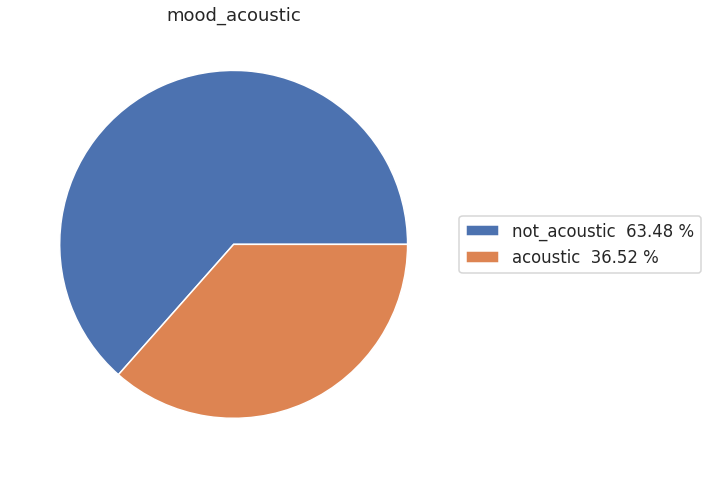

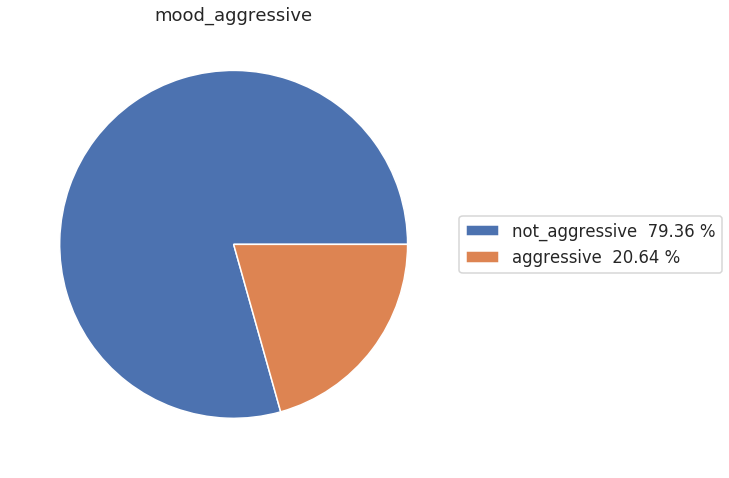

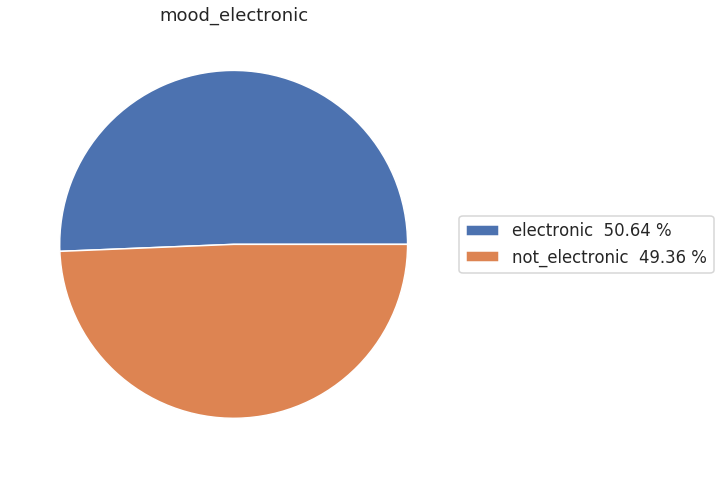

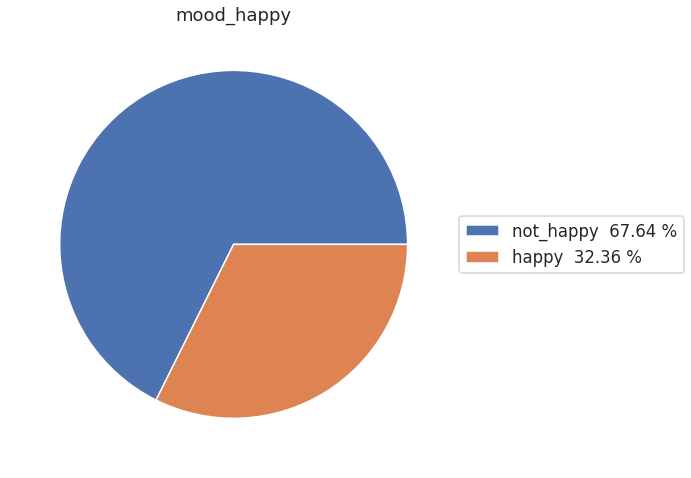

In [8]:
graphs.genre_pie(ac_counts, mood_acoustic, 'mood_acoustic')
graphs.genre_pie(ag_counts, mood_aggressive, 'mood_aggressive')
graphs.genre_pie(el_counts, mood_electronic, 'mood_electronic')
graphs.genre_pie(ha_counts, mood_happy, 'mood_happy')

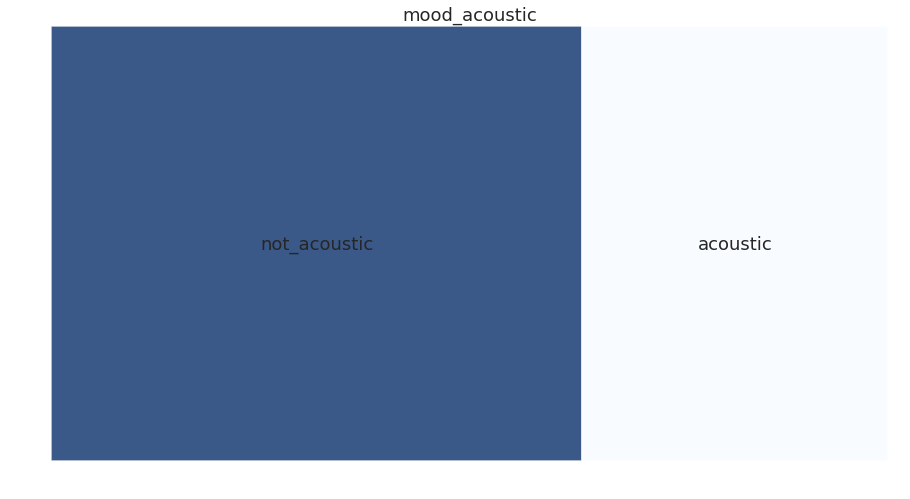

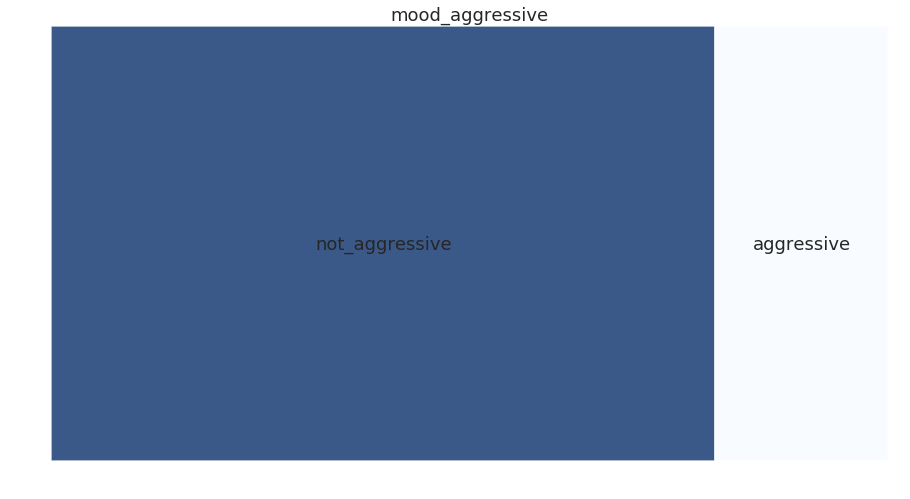

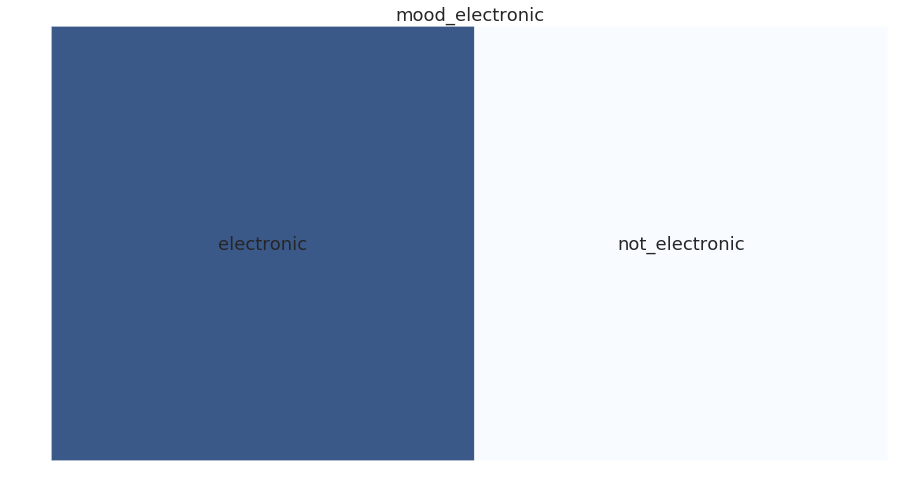

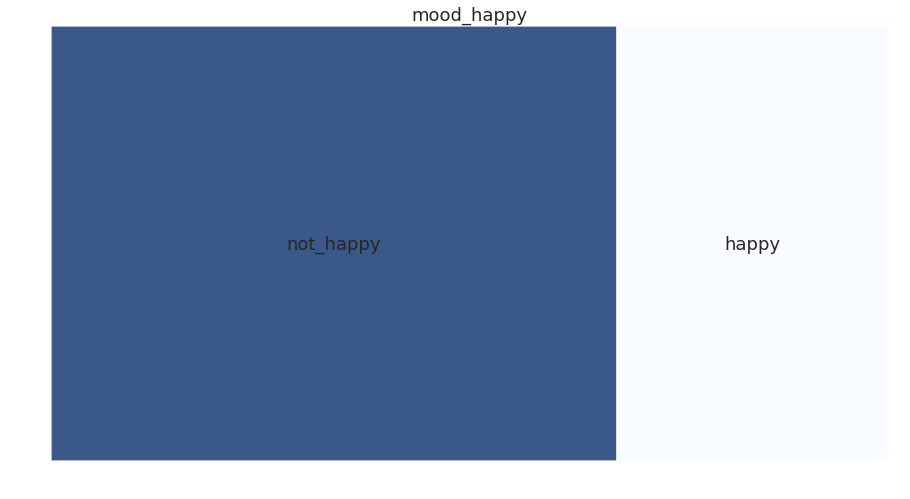

In [9]:
graphs.genre_map(ac_counts, mood_acoustic, 'mood_acoustic', 0)
graphs.genre_map(ag_counts, mood_aggressive, 'mood_aggressive', 0)
graphs.genre_map(el_counts, mood_electronic, 'mood_electronic', 0)
graphs.genre_map(ha_counts, mood_happy, 'mood_happy', 0)

In [10]:
genres = pd.read_csv('ab-2017-01-23-highlevel-genres.csv')

In [11]:
mood_genre = collections.defaultdict(list)

genre_rosamerica = genres['genre_rosamerica']
g_mbids = genres['mbid']
g_dict = dict(zip(g_mbids, genre_mapping.map(genre_rosamerica)))

mood_acoustic = moods['value_mood_acoustic']
m_mbids = moods['mbid']
m_dict = dict(zip(m_mbids, mood_acoustic))

for mbid in g_dict:
    
    if mbid in m_dict: 
        mood_genre[m_dict[mbid]].append(g_dict[mbid]) 

In [12]:
ac_genre_counts = pd.Series.value_counts(mood_genre['acoustic'])
nac_genre_counts = pd.Series.value_counts(mood_genre['not_acoustic'])

mood = ['acoustic'] * len(ac_genre_counts) + ['not_acoustic'] * len(nac_genre_counts)
genre_counts = ac_genre_counts.sort_index().append(nac_genre_counts.sort_index())

In [13]:
pct = 100 * ac_genre_counts /(ac_genre_counts + nac_genre_counts)
pct = pct.append(100 - pct)

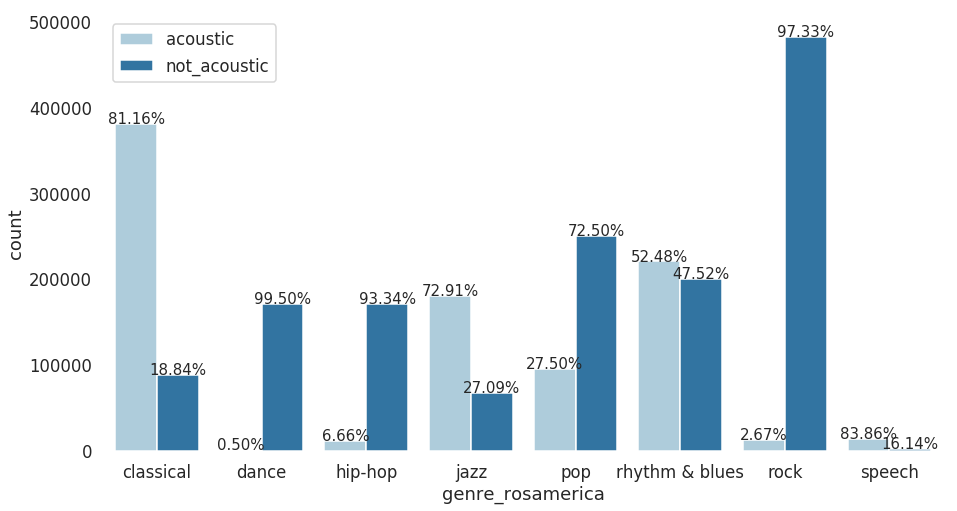

In [14]:
graphs.genre_mood_bar(mood, genre_counts, pct, 'genre_rosamerica')